Costs of College, Private and Public

An analysis by Michael Tang

# Table of Contents


1.   Introduction
2.   Data Collection and Tidying
3.   Exploratory Analysis

> 3a. Hours needed to work to pay for college

4.   Machine Learning 

> 4a. Analysing Growth Rates to Compare Private vs Public College Costs

> 4b. How do these Growth Rates Compare to the Growth of Minimum Wage

5. Conclusion and Final Thoughts








# 1. Introduction
As a college student I worry a lot about tuition costs and fees because I need to feel like I'm gettiing my moneys worth here. I can speak for my personal friends and many peers that many of us feel like higher education is becoming more and more expensive with little improvement to the quality of learning. We feel like it's becoming more and more of a scam. All the while, we are constantly told by the older generations that it's a worthwhile investment because "you can work through college and pay for it while you study." 

In this project I'll be examining the cost of attending college and wether or not we can follow the older generation's advice to just "work through college". In addition, I want to analyze the trends to see if the situtation is getting better or worse. 

# Required Tools
First we need to import the required tools. 
Here are the libraries needed for this tutorial:


1.   pandas
2.   numpy
3.   requests
4.   matplotlib
5.   sklearn
6.   statsmodels.api



# 2. Data Collection and Tidying
Now what we're going to do is collect our data.
We're going to scrape data from the National Center for Education Statistics (NCES) site to find the average cost per year of attending different college institutions.
We do this by making a request to the site, convert it to HTML, and isolate the table with the statistics we need in that HTML.
Below is the code and the raw table we have extracted.

In [80]:
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt
import matplotlib

# Request from the site and scrape the table of tuitions from 1985 - 2019
r = rq.get('https://nces.ed.gov/fastfacts/display.asp?id=76')

tableIndex = r.text.find('<table')
endTableIndex = r.text.find("</table>")
table = r.text[tableIndex:endTableIndex + len("</table>")]
#print(table)
df = pd.read_html(table)
df = df[0]
display(df)

,0,1,2,3,4,5,6,7
0,"Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...","Average total tuition, fees, room and board ra...",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year and control of institution,Constant 2018–19 dollars1,Constant 2018–19 dollars1,Constant 2018–19 dollars1,Current dollars,Current dollars,Current dollars,NaN
3,Year and control of institution,All institutions,All institutions,All institutions,All institutions,All institutions,All institutions,All institutions
4,1985–862,"$11,369","$12,811","$7,836","$4,885","$5,504","$3,367",NaN
...,...,...,...,...,...,...,...,...
63,2014–15,40045,40651,26032,37422,37988,24327,NaN
64,2015–16,41472,42021,25909,39016,39534,24375,NaN
65,2016–17,42712,43279,25976,40922,41465,24888,NaN
66,2017–18,43557,44025,26126,42673,43131,25596,NaN



As you can see, this table is a mess. Column names are confusing, superscripts became normal numbers, and not all the data is formatted the same way (some have dollar signs).
Let's try and clean this up as well as isolate the data we want to look at.

Let's only analyze 4 year institutions and split them by private and public.
First we seperate them into public and private univerities, extract the year into a uniform format, then extract the 4 year cost. We have to remove the dollar sign and comma from the first entry.
Below is the resulting cleaned up table.


In [81]:
public = df[26:46]
public4y = pd.DataFrame(index = public[0].map(lambda x: x[:4]))
public4y["Annual Cost Of 4 Year Public Schools"] = public[1].values
public4y.loc["1985","Annual Cost Of 4 Year Public Schools"] = public4y.loc["1985","Annual Cost Of 4 Year Public Schools"].replace("$","").replace(",","")
public4y.loc["1985","Annual Cost Of 4 Year Public Schools"] = float(public4y.loc["1985","Annual Cost Of 4 Year Public Schools"])

private = df[47:]
private4y = pd.DataFrame(index = private[0].map(lambda x: x[:4]))
private4y["Annual Cost Of 4 Year Private Schools"] = private[1].values
private4y.loc["1985","Annual Cost Of 4 Year Private Schools"] = private4y.loc["1985","Annual Cost Of 4 Year Private Schools"].replace("$","").replace(",","")
private4y.loc["1985","Annual Cost Of 4 Year Private Schools"] = float(private4y.loc["1985","Annual Cost Of 4 Year Private Schools"])

cost4y = public4y.merge(private4y, left_index = True, right_index = True)
display(cost4y)

,Annual Cost Of 4 Year Public Schools,Annual Cost Of 4 Year Private Schools
0,,
1985,8312,20678
1995,10255,28209
2000,10973,30916
2001,11401,31857
2002,11824,32461
2003,12585,33513
2004,13033,34110
2005,13306,34247
2007,13842,35613


Using statistics from the US department of labor (https://www.dol.gov/agencies/whd/minimum-wage/history/chart), we can construct a table of the federal minimum wages over the years we have data for college expenses. We have to do this manually per year to fit our college expenses data.


1985 - $3.35/Hr

1995 - $3.80/Hr

2000-2007 - $5.15/Hr

2007-2008 - $5.85/Hr

2008-2009 - $6.55/Hr

2009- Present - $7.25/Hr

Below is the minimum wage table.

In [82]:
# Extract the years
years = list(public4y.index)
# Create the array to hold the min wages 
minWages = [0]*len(years)
# Set the minimum wages to the corresponding years
minWages[0] = 3.35
minWages[1] = 3.80
minWages[2:9] = [5.15]*len(minWages[2:9])
minWages[9] = 5.85
minWages[10] = 6.55
minWages[11:] = [7.25]*len(minWages[11:])
minWagePerYear = pd.DataFrame(index = years)
minWagePerYear["Minimum Wage"] = minWages
display(minWagePerYear)

,Minimum Wage
1985,3.35
1995,3.80
2000,5.15
2001,5.15
2002,5.15
2003,5.15
2004,5.15
2005,5.15
2007,5.15
2008,5.85


We can now merge this table with the college expenses table to make a table showing the minumum wage over the years and the costs of attending private and public colleges during those years.

In [83]:
finalTable = cost4y.merge(minWagePerYear, left_index = True, right_index = True)
display(finalTable)

,Annual Cost Of 4 Year Public Schools,Annual Cost Of 4 Year Private Schools,Minimum Wage
0,,,
1985,8312,20678,3.35
1995,10255,28209,3.80
2000,10973,30916,5.15
2001,11401,31857,5.15
2002,11824,32461,5.15
2003,12585,33513,5.15
2004,13033,34110,5.15
2005,13306,34247,5.15
2007,13842,35613,5.15


With this, we have finished our data curation.

# 3. Exploratory Analysis
With our Data Gathered, we can do an Exploratory Analysis

# 3a. Hours of work needed to pay for college

First, we can calculate how many hours of working a minimum wage job it would take to pay off the fees each year at school.

In [84]:
finalTable["Hours Worked to Pay for Public School"] = finalTable["Annual Cost Of 4 Year Public Schools"].astype(float)/finalTable["Minimum Wage"]
finalTable["Hours Worked to Pay for Private School"] = finalTable["Annual Cost Of 4 Year Private Schools"].astype(float)/finalTable["Minimum Wage"]
display(finalTable)

,Annual Cost Of 4 Year Public Schools,Annual Cost Of 4 Year Private Schools,Minimum Wage,Hours Worked to Pay for Public School,Hours Worked to Pay for Private School
0,,,,,
1985,8312,20678,3.35,2481.194030,6172.537313
1995,10255,28209,3.80,2698.684211,7423.421053
2000,10973,30916,5.15,2130.679612,6003.106796
2001,11401,31857,5.15,2213.786408,6185.825243
2002,11824,32461,5.15,2295.922330,6303.106796
2003,12585,33513,5.15,2443.689320,6507.378641
2004,13033,34110,5.15,2530.679612,6623.300971
2005,13306,34247,5.15,2583.689320,6649.902913
2007,13842,35613,5.15,2687.766990,6915.145631


Let's graph both over time to see if students nowadays actually have it worse.

Text(0.5, 1.0, 'Hours Needed to Pay for Public College VS Year')

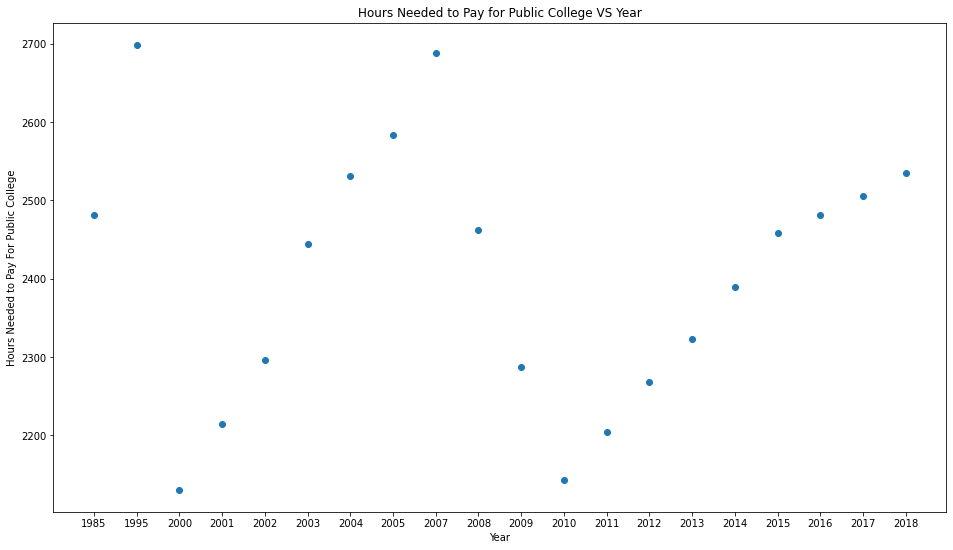

In [85]:
hoursForPublicSchool = list(finalTable['Hours Worked to Pay for Public School'])
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
display(plt.scatter(years,hoursForPublicSchool))
plt.xlabel('Year')
plt.ylabel('Hours Needed to Pay For Public College')
plt.title("Hours Needed to Pay for Public College VS Year")

Text(0.5, 1.0, 'Hours Needed to Pay for Private College VS Year')

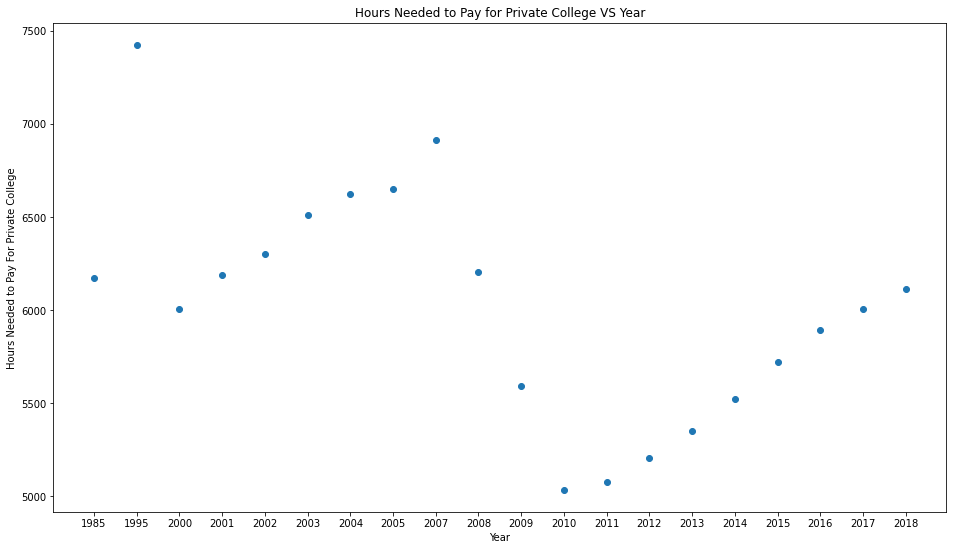

In [86]:
hoursForPrivateSchool = list(finalTable['Hours Worked to Pay for Private School'])
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
display(plt.scatter(years,hoursForPrivateSchool))
plt.xlabel('Year')
plt.ylabel('Hours Needed to Pay For Private College')
plt.title("Hours Needed to Pay for Private College VS Year")

Looking at the entire trend, interestingly enough, the data shows that the number of hours students would have to work to pay to go to college trended up, dipped down, and is slowly climbing back to "normal". This is contrary to popular belief (at least among college students) that right now, we have it the worst.
There may be some credence to our complaints however, as just looking at the recent trend (2010-2018) sets off some alarm bells. Just in 8 years, we'd have to work an extra 500 (for public) or 1000 (for private) hours at minuimum wage just to pay for college.

In addition, a quick google search shows that a full time job is on average 2080 hours of work a year. 

Looking at both our graphs, a full time job was never enough to pay for an public college (all our values are above 2080), and even working two full time jobs was never enogh to pay for a private college (all values on the private school graph are above 50000). Maybe college is just unreasonably priced all the way back in 1985 as well.

Another explanation for me and my peers feeling like college is getting worse is because we've only observed the trend since 2010 (we are pretty young). If we only saw the graph from 2010 to where we are now, it's understandable why we'd think the prices are getting unreasonable: both graphs are trending up from 2010 onwards.

# 4. Machine Learning

# 4a. Analysing Growth Rates Public VS Private
We will be using a machine learning package, sklearn, in python to fit our data to a line using linear regression.
Doing this, we can analyze the growth rates of the cost of public vs private schools, and do a hypothesis test to see if they are different.

To learn more about linear regression, you can read [here](https://realpython.com/linear-regression-in-python/)


The coeficcient is: [353.16453706]


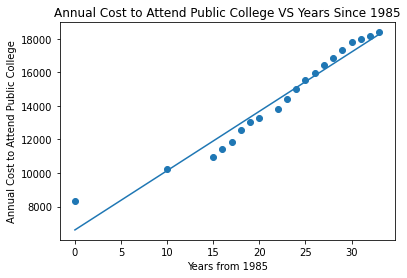

In [87]:
from sklearn.linear_model import LinearRegression

X = years
# Normalize the years as years since data collection began (1985)
X = np.array([float(x) - 1985 for x  in X]).reshape(-1, 1)
y = finalTable["Annual Cost Of 4 Year Public Schools"]

# Run linear regression
reg = LinearRegression()
reg.fit(X,y)

# Plot our Linear regression line
plt.scatter(X,y)

yPred = reg.predict(X)
plt.plot(X, yPred)
plt.xlabel('Years from 1985')
plt.ylabel('Annual Cost to Attend Public College')
plt.title("Annual Cost to Attend Public College VS Years Since 1985")
print("The coeficcient is: " + str(reg.coef_))

This graph shows us that the annaul cost of attending public college rises around 353 dollars per year since 1985.

The coeficcient is: [676.2024769]


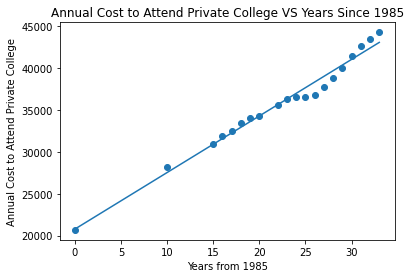

In [88]:
y = finalTable["Annual Cost Of 4 Year Private Schools"]

# Run linear regression
reg = LinearRegression()
reg.fit(X,y)

# Plot our Linear regression line
plt.scatter(X,y)

yPred = reg.predict(X)
plt.plot(X, yPred)
plt.xlabel('Years from 1985')
plt.ylabel('Annual Cost to Attend Private College')
plt.title("Annual Cost to Attend Private College VS Years Since 1985")
print("The coeficcient is: " + str(reg.coef_))

This graph shows us that the annaul cost of attending private college rises around 676 dollars per year since 1985.

Using these two values, 353.16453706 per year for public schools, and 676.2024769 per year for private schools, and just looking at the data, it seems like private schools are almost double the cost of public schools. Let's compare (private schools)/2 and public schools.


The coeficcient for Public School is: [353.16453706]
The coeficcient for (Private school)/2 is: [338.10123845]


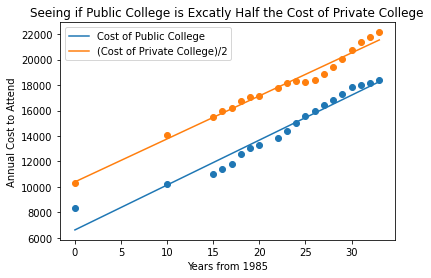

In [89]:
finalTable["Private Schools/2"] = finalTable["Annual Cost Of 4 Year Private Schools"].astype(float)/2
y = finalTable["Annual Cost Of 4 Year Public Schools"]

# Run linear regression
reg = LinearRegression()
reg.fit(X,y)

# Plot our Linear regression line
plt.scatter(X,y)

yPred = reg.predict(X)
plt.plot(X, yPred, label = "Cost of Public College")
plt.xlabel('Years from 1985')
plt.ylabel('Annual Cost to Attend')
plt.title("Seeing if Public College is Excatly Half the Cost of Private College")
pub_coef = str(reg.coef_)

y = finalTable["Private Schools/2"]

# Run linear regression
reg = LinearRegression()
reg.fit(X,y)

# Plot our Linear regression line
plt.scatter(X,y)

yPred = reg.predict(X)
plt.plot(X, yPred, label = "(Cost of Private College)/2")
plt.legend()
print("The coeficcient for Public School is: " + pub_coef)
print("The coeficcient for (Private school)/2 is: " + str(reg.coef_))

From this graph, it looks like they are growing pretty similarly. It looks like private schools's tuition is increasing at twice the rate of public school's. 
We can do a hypothesis test to confirm this. I want to test if the regression line for private/2 is the same as public. 

If the regression lines are the same, it would help students understand that private colleges are pretty much double the price of public, and the price is also growing at a doubled rate.

To do this, we need to import another package, statsmodels.api

We are testing (Private/2 = Public) which equivalently is (Private/2 - Public = 0)

The Null Hypothesis is that the slopes and intercepts of Private/2 and Public are the same.

The alternative hypothesis is that the slopes and intercepts of Private/2 and Public are different.

In [90]:
import statsmodels.api as sm
# Calcuate the difference
diff = finalTable["Private Schools/2"].astype(float).values - finalTable["Annual Cost Of 4 Year Public Schools"].astype(float).values
# Let create a linear regression
mod = sm.OLS(diff, sm.add_constant(X))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.4799
Date:                Sun, 19 Dec 2021   Prob (F-statistic):              0.497
Time:                        20:40:02   Log-Likelihood:                -160.39
No. Observations:                  20   AIC:                             324.8
Df Residuals:                      18   BIC:                             326.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3776.6084    513.956      7.348      0.0

This output tells us that private colleges are not exactly double the price of public colleges. When divided by 2, private colleges are around 3,776 dollars more expensive, meaning they are around 7,552 dollars more expensive. However, our results fail to reject that the two slopes are different, in favor of that they are the same. This hypothesis test backs up our belief that private college's growth rate closely follows 2x the growth of public colleges.

To learn more about hypothesis tests and how to interpret these results, you can read [here](https://https://statisticsbyjim.com/regression/comparing-regression-lines/)


We can further confirm this with a test of correlation.

In [1]:
mod = sm.OLS(finalTable["Annual Cost Of 4 Year Private Schools"].astype(float).values, finalTable["Annual Cost Of 4 Year Public Schools"].astype(float).values)
res = mod.fit()
print(res.summary())
plt.plot(finalTable["Annual Cost Of 4 Year Public Schools"].astype(float).values,finalTable["Annual Cost Of 4 Year Private Schools"].astype(float).values)
plt.xlabel('Annual Cost Of 4 Year Public Schools')
plt.ylabel('Annual Cost Of 4 Year Private Schools')
plt.title("Private vs Public Costs")

NameError: name 'sm' is not defined

As we can see, the two lines are extremely closely correlated with a R-squared of 0.996. This means the correlation coefficient is the positive (since we can see its a positive trend on the plot) sqrt(rsquared) = 0.99799 which is extremely high


To learn more about correlation and regression, click [here](https://https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression)

The P-value is essentially zero, meaning the slope is good to use. This regression analysis shows us that private colleges are actually closer to 2.45 the cost of public schools rather than the double we loosely observed from the data.

To learn more about how to interpret these regression analysis, click [here](https://https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients)



#4b. How do these Growth Rates Compare to the Growth of Minimum Wage
I want to calculate the percent change per year and compare it to the percent change in minimum wage per year. I think using the rates from the linear regression will be more insightful than calculating the percent change from the raw data.

Calculating the percent change from the raw data would look like this: (Cost at 2015 - Cost at 2014)/(Cost at 2014) * 100 which is susceptable to smaller trends within years.

Using the calcalation of (Change per year from regression)/(Cost at 2014) will better capture the overall trend of average percent change.


In [2]:
finalTable["Percent Change in Costs for Public Schools"] = 353.16453706/finalTable["Annual Cost Of 4 Year Public Schools"].astype(float)*100
finalTable["Percent Change in Costs for Private Schools"] = 676.2024769/finalTable["Annual Cost Of 4 Year Private Schools"].astype(float)*100
display(finalTable)

NameError: name 'finalTable' is not defined

In [3]:
y = finalTable["Minimum Wage"]

# Run linear regression
reg = LinearRegression()
reg.fit(X,y)

# Plot our Linear regression line
plt.scatter(X,y)

yPred = reg.predict(X)
plt.plot(X, yPred)
plt.xlabel('Years from 1985')
plt.ylabel('Hourly Minimum Wage in Dollars')
plt.title("Hourly Minimum Wage in Dollars VS Years Since 1985")
print("The coeficcient is: " + str(reg.coef_))

NameError: name 'finalTable' is not defined

This graph shows us that since 1985, the minimum wage increases around 0.1471496 dollars per year.

In [4]:
finalTable["Percent Change in Costs for Minimum Wage"] = 0.1471496/finalTable["Minimum Wage"].astype(float)*100
display(finalTable)

plt.plot(X, finalTable["Percent Change in Costs for Public Schools"], label = "Percent Change in Costs for Public Schools")
plt.plot(X, finalTable["Percent Change in Costs for Private Schools"], label = "Percent Change in Costs for Private Schools")
plt.plot(X, finalTable["Percent Change in Costs for Minimum Wage"], label = "Percent Change in Costs for Minimum Wage")
plt.legend()

NameError: name 'finalTable' is not defined

Again, contrary to my and my peers expecations, it seems as though the percentage change of minimum wage is very similar to the percentage change for college expenses. I was expectnig that minimum wage's percentage change would be way lower in comparison, and that college expenses were growing way faster than minimum wage was, but the data says otherwise.


# 5. Conclusion and Final Thoughts
My expectations were proven wrong, and minimum wage has been growing at the same rate as college tuition. However, maybe we should be talking about how much college costs in general since the lowest amount of hours needed to work at minimum wage to pay for college at a public or private institution is not reasonable.

Some things to consider are that I couldn't find good data for the earlier years which is closer to the when people say they worked through college with a part time job. If I were to do this again, I'd search deeper for earlier records, maybe going to each college individually and noting their previous costs for data curation. I felt like that was out of the scope of this class, and there wasn't an existing table I could find, so I settled on this.

In terms of results and why we college students feel this way could be due to economical changes. This analysis only takes into account college expenses and minimum wage, but not the economy. I know my peers and I are worried about the housing market, and more and more necessary costs that older generations did not have. For example, technological devices and wifi are expenses people going through college did not have to deal with. Right now, the automotive market is terrible, and gas prices are rising. I would be interested in seeing how the cost of living in terms of housing and necessary expenses has gone up over time in addition to college, because I want to be proven right. This analysis proved me wrong that college expenses are not getting worse, but also showed me college expenses have always been unreasonable. To feel more fulfilled I'd look for other reasons to complain such as the economy and analyze that in addition to college expenses to justify how me and my peers feel.